## Check Installation & Import Modules

In [1]:
from osgeo import gdal
print("Using gdal version", gdal.__version__)

Using gdal version 3.7.0


In [2]:
import pywapor
print("Using pywapor version:", pywapor.__version__)

/Users/micky/anaconda3/envs/test_pywapor/lib/python3.11/site-packages/pywapor/enhancers/smooth/core.py:21: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  v = np.where(Y > Z, a_, 1 - a_)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/micky/anaconda3/envs/test_pywapor/lib/python3.11/site-packages/pywapor/enhancers/smooth/core.py:128: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  Y_ = np.where(w == 0, 0, Y)


Using pywapor version: 3.3.5


In [3]:
%matplotlib inline
import xarray as xr
print("Using xarray version:", xr.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray
print("Using rioxarray version:", rioxarray.__version__)
import rasterio.crs as crs_r

Using xarray version: 2023.5.0
Using rioxarray version: 0.14.1


In [4]:
from functools import partial
import pywapor.se_root as se_root

In [5]:
import glob
import os

## User Inputs

### Basic Default Configuration **(Needs NASA Earthdata Login Details)**

In [ ]:
pywapor.collect.accounts.setup("NASA")

In [6]:
# Specify data input and output folders

# The default ETLook project output folder
default_project_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_default_pywapor_3"

# The folder containing custom data
custom_data_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_custom_2/DataOutputs(1Jan)"

# The folder for all netCDF created outputs
# TODO: Check if we need to store xr.Dataset as a .nc file ... maybe not necessary?
data_custom_netcdf_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_custom_netcdf"

# The custom side loading method 1 output folder
sl_1_project_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_test_sideloading1"

In [7]:
# Time period: default composite length of pyWAPOR 10 days
timelim = ["2023-01-01", "2023-01-11"]
# Note: composites are also referred to as time_bins
composite_length = "DEKAD"

# Default data source
level = "level_1"

# Bounding box of AOI
latlim = [-34.050015, -33.370358] # first value refers to the southern border
lonlim = [18.723629, 19.390929] # first value refers to the western border

# Input Data Coordinate Reference System
project_crs = "EPSG:4326"

## Default ETLook Input

### Download input data

In [ ]:
# Download and prepare input data
ds  = pywapor.pre_et_look.main(default_project_folder, latlim, lonlim, timelim, bin_length=composite_length)

In [ ]:
# To see the file the dataset is stored in
fh = ds.encoding["source"]
print(fh)

### Input data already downloaded in default project folder

In [8]:
fh = os.path.join(default_project_folder, "et_look_in.nc")
fh

'/Users/micky/PycharmProjects/hackathon_pywapor/data_default_pywapor_3/et_look_in.nc'

In [9]:
# To import the file the dataset is stored in (et_look_in.nc) (if you don't want to run pre_et_look again)
# The decode_coords keyword is used to make sure CRS info is loaded correctly.
ds = xr.open_dataset(fh, decode_coords = "all")

In [10]:
# Take a closer look at the contents of the datasets
# This variable contains a xarray.Dataset which is a Python-package that let's you work with large multi-dimensional datasets.
ds

<xarray.Dataset>
Dimensions:              (x: 261, y: 266, time_bins: 1)
Coordinates:
  * x                    (x) float64 18.72 18.73 18.73 ... 19.38 19.39 19.39
  * y                    (y) float64 -33.37 -33.37 -33.38 ... -34.05 -34.05
    spatial_ref          int64 ...
  * time_bins            (time_bins) datetime64[ns] 2023-01-01
Data variables: (12/78)
    ndvi                 (time_bins, y, x) float64 ...
    r0                   (time_bins, y, x) float64 ...
    se_root              (time_bins, y, x) float64 ...
    p_24                 (time_bins, y, x) float64 ...
    z                    (y, x) float64 ...
    ra_24                (time_bins, y, x) float64 ...
    ...                   ...
    o2                   float64 ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...
    r0_bare              float64 ...
    r0_full              float64 ...

In [ ]:
list(ds.data_vars)

In [ ]:
# Access the coordinate reference system and boundaries
print("DS CRS: ",ds.rio.crs)
print("DS Bounds: ",ds.rio.bounds())
print("DS Resolution: ",ds.rio.resolution())

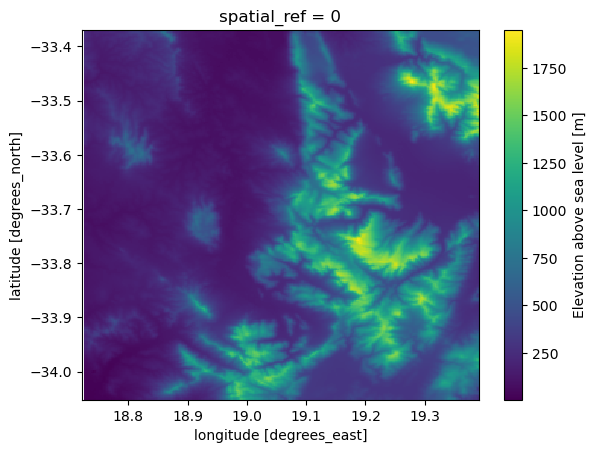

In [11]:
# XArray datasets are also easy to plot 
# and smart enough to automatically fill in the units and the description of the variable.
ds.z.plot()

In [ ]:
fig, axes = plt.subplots(ncols=3,figsize=(16,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.t_air_min_24.isel(time_bins = 0).plot(ax=axes[0])
ds.t_air_24.isel(time_bins = 0).plot(ax=axes[1])
ds.t_air_max_24.isel(time_bins = 0).plot(ax=axes[2])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Running Default ETLook

### Run the ETLook model

In [ ]:
ds_out = pywapor.et_look.main(ds)

### ETLook output already created in default project folder

In [12]:
default_etlook_out = os.path.join(default_project_folder, "et_look_out.nc")
default_etlook_out

'/Users/micky/PycharmProjects/hackathon_pywapor/data_default_pywapor_3/et_look_out.nc'

In [13]:
# To import the file the dataset is stored in (et_look_out.nc) (if you don't want to run et_look again)
# The decode_coords keyword is used to make sure CRS info is loaded correctly.
ds_out = xr.open_dataset(default_etlook_out, decode_coords = "all")

In [14]:
# Check the contents of the new dataset
ds_out

<xarray.Dataset>
Dimensions:       (time_bins: 1, y: 266, x: 261)
Coordinates:
  * x             (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.39 19.39
  * y             (y) float64 -33.37 -33.37 -33.38 ... -34.05 -34.05 -34.05
    spatial_ref   int64 ...
  * time_bins     (time_bins) datetime64[ns] 2023-01-01
Data variables:
    int_mm        (time_bins, y, x) float64 ...
    t_24_mm       (time_bins, y, x) float64 ...
    e_24_mm       (time_bins, y, x) float64 ...
    et_24_mm      (time_bins, y, x) float64 ...
    et_ref_24_mm  (time_bins, y, x) float64 ...
    se_root       (time_bins, y, x) float64 ...
    npp           (time_bins, y, x) float64 ...

In [ ]:
# Plot the daily evapotranspiration in mm
ds_out.et_24_mm.isel(time_bins = 0).plot()

In [ ]:
# Note these calculations loads the array into working memory
et_data = ds_out.et_24_mm.isel(time_bins = 0).values
print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))

## TEST SIDELOADING METHOD 1
Instead of passing a string to the sources input parameters of `pywapor.pre_et_look.main` we can also pass a dictionary that specifies which products we would like to use.

### Loading multiple GeoTIFF files into a single xarray.Dataset

Help from: https://docs.dea.ga.gov.au/notebooks/How_to_guides/Opening_GeoTIFFs_NetCDFs.html

Citation:
Krause, C., Dunn, B., Bishop-Taylor, R., Adams, C., Burton, C., Alger, M., Chua, S., Phillips, C., Newey, V., Kouzoubov,
K., Leith, A., Ayers, D., Hicks, A., DEA Notebooks contributors 2021. Digital Earth Australia notebooks and tools 
repository. Geoscience Australia, Canberra. https://doi.org/10.26186/145234

### STATIC: Convert GeoTIFF to netCDF

In [15]:
def load_one_band_geotiff_to_xdataset_static(file_path: str, variable_name: str):
    
    # Open into an xarray.DataArray
    geotiff_da = rioxarray.open_rasterio(file_path)

    # Convert our xarray.DataArray into a xarray.Dataset
    geotiff_ds = geotiff_da.to_dataset('band')

    # Rename the variable to a more useful name
    geotiff_ds = geotiff_ds.rename({1: variable_name})
    
    return geotiff_ds

In [16]:
# STATIC VARIABLES
# Elevation: z [m]
z_file_path = os.path.join(custom_data_folder, "new_dem.tif")
z_ds = load_one_band_geotiff_to_xdataset_static(z_file_path, "z")
# Minimum stomatal resistance[s/m]: rs_min
rs_min_file_path = os.path.join(custom_data_folder, "rs_min.tif")
rs_min_ds = load_one_band_geotiff_to_xdataset_static(rs_min_file_path, "rs_min")
# Maximum obstacle height [m]: z_obst_max
z_obst_max_file_path = os.path.join(custom_data_folder, "rz_obs.tif")
z_obst_max_ds = load_one_band_geotiff_to_xdataset_static(z_obst_max_file_path, "z_obst_max")
# Yearly Air Temp Amplitude[K]: t_amp_year --> default seems to also be celcius
# t_amp_year = 34.3
# Optimum Air Temp for plant growth [C]: t_opt
# t_opt = 29.0

In [ ]:
z_ds

In [ ]:
rs_min_ds

In [ ]:
z_obst_max_ds

In [17]:
# Access the coordinate reference system and boundaries
print("*******************************************************************")
print("***************************   ELEVATION  ***************************")
print("*******************************************************************")
print("DS CRS: ",z_ds.rio.crs)
print("DS Bounds: ",z_ds.rio.bounds())
print("DS Resolution: ",z_ds.rio.resolution())
print("*******************************************************************")
print("*******************************************************************")
print("********************   MAX OBSTICLE HEIGHT  ***********************")
print("*******************************************************************")
print("DS CRS: ",z_obst_max_ds.rio.crs)
print("DS Bounds: ",z_obst_max_ds.rio.bounds())
print("DS Resolution: ",z_obst_max_ds.rio.resolution())
print("*******************************************************************")
print("*******************************************************************")
print("********************   MIN STOMATA RESISTANCE  ********************")
print("*******************************************************************")
print("DS CRS: ",rs_min_ds.rio.crs)
print("DS Bounds: ",rs_min_ds.rio.bounds())
print("DS Resolution: ",rs_min_ds.rio.resolution())
print("*******************************************************************")

*******************************************************************
***************************   ELEVATION  ***************************
*******************************************************************
DS CRS:  EPSG:4326
DS Bounds:  (18.723629024529, -34.050014748210025, 19.390928599196155, -33.370357774012)
DS Resolution:  (0.0024714799061746335, -0.002471479906174636)
*******************************************************************
*******************************************************************
********************   MAX OBSTICLE HEIGHT  ***********************
*******************************************************************
DS CRS:  EPSG:4326
DS Bounds:  (18.723585466903, -34.049913822508, 19.390885041523, -33.370256848358)
DS Resolution:  (0.002471479905999998, -0.0024714799059999976)
*******************************************************************
*******************************************************************
********************   MIN STOMATA RESISTANCE  ****

In [18]:
reproject_rs_min_ds = rs_min_ds.rio.reproject_match(z_ds)
reproject_z_obst_max_ds = z_obst_max_ds.rio.reproject_match(z_ds)

In [19]:
# Access the coordinate reference system and boundaries
print("*******************************************************************")
print("***************************   ELEVATION  ***************************")
print("*******************************************************************")
print("DS CRS: ",z_ds.rio.crs)
print("DS Bounds: ",z_ds.rio.bounds())
print("DS Resolution: ",z_ds.rio.resolution())
print("*******************************************************************")
print("*******************************************************************")
print("********************   MAX OBSTICLE HEIGHT  ***********************")
print("*******************************************************************")
print("DS CRS: ",reproject_z_obst_max_ds.rio.crs)
print("DS Bounds: ",reproject_z_obst_max_ds.rio.bounds())
print("DS Resolution: ",reproject_z_obst_max_ds.rio.resolution())
print("*******************************************************************")
print("*******************************************************************")
print("********************   MIN STOMATA RESISTANCE  ********************")
print("*******************************************************************")
print("DS CRS: ",reproject_rs_min_ds.rio.crs)
print("DS Bounds: ",reproject_rs_min_ds.rio.bounds())
print("DS Resolution: ",reproject_rs_min_ds.rio.resolution())
print("*******************************************************************")

*******************************************************************
***************************   ELEVATION  ***************************
*******************************************************************
DS CRS:  EPSG:4326
DS Bounds:  (18.723629024529, -34.050014748210025, 19.390928599196155, -33.370357774012)
DS Resolution:  (0.0024714799061746335, -0.002471479906174636)
*******************************************************************
*******************************************************************
********************   MAX OBSTICLE HEIGHT  ***********************
*******************************************************************
DS CRS:  EPSG:4326
DS Bounds:  (18.723629024529, -34.050014748210025, 19.390928599196155, -33.370357774012)
DS Resolution:  (0.0024714799061746383, -0.002471479906174628)
*******************************************************************
*******************************************************************
********************   MIN STOMATA RESISTANCE

In [20]:
main_static_ds = xr.Dataset()
main_static_ds['z'] = z_ds.z
main_static_ds['rs_min'] = reproject_rs_min_ds.rs_min
main_static_ds['z_obst_max'] = reproject_z_obst_max_ds.z_obst_max
#main_static_ds['t_amp_year'] = t_amp_year
#main_static_ds['t_opt'] = t_opt

main_static_ds

<xarray.Dataset>
Dimensions:      (x: 270, y: 275)
Coordinates:
  * x            (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.38 19.39 19.39
  * y            (y) float64 -33.37 -33.37 -33.38 ... -34.04 -34.05 -34.05
    spatial_ref  int64 0
Data variables:
    z            (y, x) int32 ...
    rs_min       (y, x) int8 33 33 33 33 33 31 40 40 40 ... 9 9 9 32 9 32 32 19
    z_obst_max   (y, x) int8 33 33 33 33 33 31 40 40 40 ... 9 9 9 32 9 32 32 19

In [21]:
# Save dataset to a netcdf file.
static_file = os.path.join(data_custom_netcdf_folder, "custom_static.nc")
# TODO: check if it is okay to use this function (not on the pywapor doc api)
pywapor.general.processing_functions.save_ds(
    main_static_ds, 
    static_file, 
    encoding="initiate", 
    label="Testing: Static Dataset")

<xarray.Dataset>
Dimensions:      (x: 270, y: 275)
Coordinates:
  * x            (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.38 19.39 19.39
  * y            (y) float64 -33.37 -33.37 -33.38 ... -34.04 -34.05 -34.05
    spatial_ref  int64 ...
Data variables:
    z            (y, x) float64 dask.array<chunksize=(275, 270), meta=np.ndarray>
    rs_min       (y, x) float64 dask.array<chunksize=(275, 270), meta=np.ndarray>
    z_obst_max   (y, x) float64 dask.array<chunksize=(275, 270), meta=np.ndarray>

In [22]:
test_static = xr.open_dataset(static_file)
test_static

<xarray.Dataset>
Dimensions:      (x: 270, y: 275)
Coordinates:
  * x            (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.38 19.39 19.39
  * y            (y) float64 -33.37 -33.37 -33.38 ... -34.04 -34.05 -34.05
Data variables:
    spatial_ref  int64 ...
    z            (y, x) float64 ...
    rs_min       (y, x) float64 ...
    z_obst_max   (y, x) float64 ...

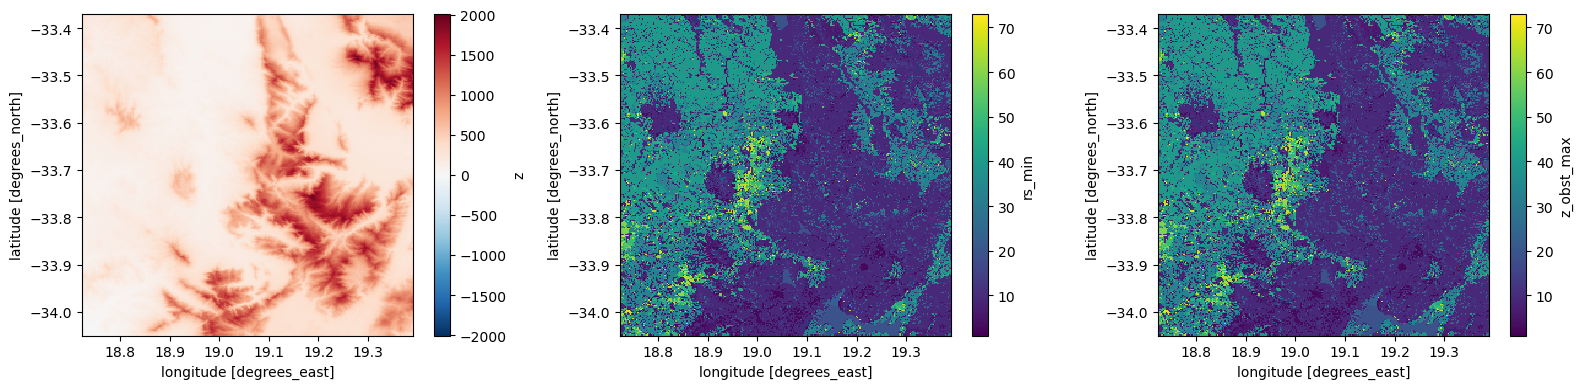

In [23]:
fig, axes = plt.subplots(ncols=3,figsize=(16,4))
test_static.z.plot(ax=axes[0])
test_static.rs_min.plot(ax=axes[1])
test_static.z_obst_max.plot(ax=axes[2])


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
elevation = test_static.z.values
print("resolution:", elevation.shape)
print("total pixels:", elevation.size)
print("number of pixels with missing data:", np.sum(np.isnan(elevation)))
print("maximum value: {0:.2f}".format(np.nanmax(elevation)))
print("minimum value: {0:.2f}".format(np.nanmin(elevation)))
print("mean: {0:.2f}".format(np.nanmean(elevation)))
print("median: {0:.2f}".format(np.nanmedian(elevation)))

resolution: (275, 270)
total pixels: 74250
number of pixels with missing data: 0
maximum value: 2006.00
minimum value: -22.00
mean: 446.57
median: 294.00


In [25]:
obstacle_height = test_static.z_obst_max.values
print("resolution:", obstacle_height.shape)
print("total pixels:", obstacle_height.size)
print("number of pixels with missing data:", np.sum(np.isnan(obstacle_height)))
print("maximum value: {0:.2f}".format(np.nanmax(obstacle_height)))
print("minimum value: {0:.2f}".format(np.nanmin(obstacle_height)))
print("mean: {0:.2f}".format(np.nanmean(obstacle_height)))
print("median: {0:.2f}".format(np.nanmedian(obstacle_height)))

resolution: (275, 270)
total pixels: 74250
number of pixels with missing data: 0
maximum value: 73.00
minimum value: 1.00
mean: 21.47
median: 13.00


### STATIC SIDELOADING METHOD 1

In [26]:
# Start by loading a defualt configuration for pre_et_look and pre_se_root
et_look_config = pywapor.general.levels.pre_et_look_levels(level = "level_1")
se_root_config = pywapor.general.levels.pre_se_root_levels(level = "level_1")

In [27]:
# Create a list of static variables
#static_vars = ['z','rs_min', 'z_obst_max', 't_amp_year', 't_opt']
static_vars = ['z','rs_min', 'z_obst_max']

In [28]:
# Check the default product source and functions
et_look_config['z_obst_max']

{'products': [{'source': 'GLOBCOVER',
   'product_name': '2009_V2.3_Global',
   'enhancers': 'default'}],
 'composite_type': None,
 'temporal_interp': None,
 'spatial_interp': 'nearest'}

In [29]:
# The default enhancers for a specific product can be accessed like this
# TODO: identify if custom products need to keep the enhancers
pywapor.collect.product.GLOBCOVER.default_post_processors('2009_V2.3_Global', 'z_obst_max')

{'z_obst_max': [functools.partial(<function lulc_to_x at 0x1422fd6c0>, in_var='lulc', out_var='z_obst_max', convertor={11: 4.0, 14: 4.0, 20: 2.0, 30: 3.5, 40: 0.1, 50: 0.6, 60: 1.2, 70: 2.0, 90: 5.0, 100: 8.0, 110: 2.0, 120: 8.0, 130: 4.0, 140: 2.0, 150: 1.0, 160: 0.3, 170: 6.0, 180: 10, 190: 10, 200: 0.1, 210: 0.1, 220: 0.1, 230: 0})]}

* For each variable we need to adjust the "products" part.
* Overwrite the list under the "products" key.
* Note: the value of "source" needs to be a function that returns a xr.Dataset which contains a variable called 't_air_max'
* For the product name we can choose a new name!

Older version doc of sideloading: https://www.fao.org/aquastat/py-wapor/notebooks/4_sideloading.html#Sideloading (before se_root model???)

The sideloading function might need to meet certain criteria.
A template function looks like this:

In [30]:
# Step 1: Define a function that can return the dataset
def static_sideload(**kwargs):
    statics_netcdf_file = os.path.join(data_custom_netcdf_folder,"custom_static.nc")
    statics_ds = xr.open_dataset(statics_netcdf_file)
    return statics_ds

In [31]:
# Step 2: Put it inside the configuration for each variable.
static_config = [{"source": static_sideload, "product_name": "STATIC_PROVIDED", "enhancers": []}]
for var in static_vars:
    et_look_config[var]["products"] = static_config
    #se_root_config[var]["products"] = static_config

In [32]:
# Now the configuration contains our new product
et_look_config['z']

{'products': [{'source': <function __main__.static_sideload(**kwargs)>,
   'product_name': 'STATIC_PROVIDED',
   'enhancers': []}],
 'composite_type': None,
 'temporal_interp': None,
 'spatial_interp': 'bilinear'}

Right now the configuration for `"se_root"` inside `et_look_config` still contains the original `level_1` configuration

In [33]:
et_look_config["se_root"]

{'products': [{'source': functools.partial(<function se_root at 0x157c43920>, bin_length=1, sources='level_1'),
   'product_name': 'v2',
   'enhancers': 'default'}],
 'composite_type': 'max',
 'temporal_interp': None,
 'spatial_interp': 'bilinear'}

In [34]:
# We can adjust it like this: pass the adjusted se_root_config to et_look_config
se_root_dler = partial(se_root.se_root, sources = se_root_config)
et_look_config["se_root"]["products"][0]["source"] = se_root_dler

In [35]:
# Now the configuration for "se_root" has been updated too
et_look_config["se_root"]

{'products': [{'source': functools.partial(<function se_root at 0x157c43920>, sources={'ndvi': {'products': [{'source': 'MODIS', 'product_name': 'MOD13Q1.061', 'enhancers': 'default', 'is_example': True}, {'source': 'MODIS', 'product_name': 'MYD13Q1.061', 'enhancers': 'default'}], 'temporal_interp': 'linear', 'spatial_interp': 'nearest'}, 'lst': {'products': [{'source': 'MODIS', 'product_name': 'MOD11A1.061', 'enhancers': 'default'}, {'source': 'MODIS', 'product_name': 'MYD11A1.061', 'enhancers': 'default'}], 'temporal_interp': None, 'spatial_interp': 'nearest'}, 't_air': {'products': [{'source': 'GEOS5', 'product_name': 'inst3_2d_asm_Nx', 'enhancers': 'default'}], 'temporal_interp': 'linear', 'spatial_interp': 'bilinear'}, 't_air_max': {'products': [{'source': 'GEOS5', 'product_name': 'inst3_2d_asm_Nx', 'enhancers': 'default'}], 'temporal_interp': 'linear', 'spatial_interp': 'bilinear'}, 't_air_min': {'products': [{'source': 'GEOS5', 'product_name': 'inst3_2d_asm_Nx', 'enhancers': 'de

#### Custom ETLook Input

In [36]:
# Finally we can start pre_et_look as usual
custom_input_ds = pywapor.pre_et_look.main(sl_1_project_folder, latlim, lonlim, timelim, bin_length=composite_length, sources = et_look_config)

> PRE_ET_LOOK
    --> Collecting `ndvi` from `MODIS.MOD13Q1.061`.
            > timesize: 1 [2023-01-09T00:00, ..., 2023-01-09T00:00]
    --> Collecting `ndvi` from `MODIS.MYD13Q1.061`.
            > timesize: 2 [2023-01-04T00:00, ..., 2023-01-17T00:00]
    --> Collecting `r0` from `MODIS.MCD43A3.061`.
            > timesize: 17 [2022-12-29T12:00, ..., 2023-01-14T12:00]
    --> Collecting `p` from `CHIRPS.P05`.
            > timesize: 17 [2022-12-29T00:30, ..., 2023-01-14T00:30]
    --> Collecting `z`, `rs_min`, `z_obst_max` from `static_sideload.STATIC_PROVIDED`.
    --> Collecting `ra` from `MERRA2.M2T1NXRAD.5.12.4`.
            > timesize: 408 [2022-12-29T01:00, ..., 2023-01-15T00:00]
    --> Collecting `t_air`, `t_air_max`, `t_air_min`, `u2m`, `v2m`, `qv`, `p_air`, `p_air_0`, `wv` from `GEOS5.inst3_2d_asm_Nx`.
            > timesize: 129 [2022-12-29T01:30, ..., 2023-01-14T01:30]
    --> Collecting `land_mask` from `GLOBCOVER.2009_V2.3_Global`.
    --> Collecting `lw_offset`, `lw_sl

                --> Saving reprojected data from t_air_i.nc:t_air (bilinear).
                    > peak-memory-usage: 127.2MB, execution-time: 0:00:02.301276.
                    > chunksize|dimsize: [time: 48|48, y: 266|266, x: 261|261]
            --> Selected `reproject_chunk` for reprojection of t_air_max_i.nc.
                --> Warping VRT to netCDF.
                    > peak-memory-usage: 7.2KB, execution-time: 0:00:00.306254.
                --> Saving reprojected data from t_air_max_i.nc:t_air_max (bilinear).
                    > peak-memory-usage: 127.2MB, execution-time: 0:00:02.278789.
                    > chunksize|dimsize: [time: 48|48, y: 266|266, x: 261|261]
            --> Selected `reproject_chunk` for reprojection of t_air_min_i.nc.
                --> Warping VRT to netCDF.
                    > peak-memory-usage: 7.2KB, execution-time: 0:00:00.305796.
                --> Saving reprojected data from t_air_min_i.nc:t_air_min (bilinear).
                    > pe

                > peak-memory-usage: 198.0KB, execution-time: 0:00:02.076894.
                > chunksize|dimsize: [time_bins: 1|1, y: 4|4, x: 4|4]
        --> (7/26) Compositing `t_air` (mean).
            --> Saving `t_air` composites.
                > peak-memory-usage: 92.8KB, execution-time: 0:00:02.065269.
                > chunksize|dimsize: [time_bins: 1|1, y: 5|5, x: 5|5]
        --> (8/26) Compositing `t_air_max` (max).
            --> Saving `t_air_max` composites.
                > peak-memory-usage: 91.8KB, execution-time: 0:00:02.072831.
                > chunksize|dimsize: [time_bins: 1|1, y: 5|5, x: 5|5]
        --> (9/26) Compositing `t_air_min` (min).
            --> Saving `t_air_min` composites.
                > peak-memory-usage: 91.5KB, execution-time: 0:00:02.076374.
                > chunksize|dimsize: [time_bins: 1|1, y: 5|5, x: 5|5]
        --> (10/26) Compositing `u2m` (mean).
            --> Saving `u2m` composites.
                > peak-memory-usage: 91.

            > peak-memory-usage: 5.6KB, execution-time: 0:00:00.016614.
        --> Saving reprojected data from v2m_bin.nc:v2m (bilinear).
            > peak-memory-usage: 2.1MB, execution-time: 0:00:02.085809.
            > chunksize|dimsize: [time_bins: 1|1, y: 266|266, x: 261|261]
    --> Selected `reproject_chunk` for reprojection of qv_bin.nc.
        --> Warping VRT to netCDF.
            > peak-memory-usage: 5.6KB, execution-time: 0:00:00.016817.
        --> Saving reprojected data from qv_bin.nc:qv (bilinear).
            > peak-memory-usage: 2.1MB, execution-time: 0:00:02.087007.
            > chunksize|dimsize: [time_bins: 1|1, y: 266|266, x: 261|261]
    --> Selected `reproject_chunk` for reprojection of p_air_bin.nc.
        --> Warping VRT to netCDF.
            > peak-memory-usage: 5.7KB, execution-time: 0:00:00.017625.
        --> Saving reprojected data from p_air_bin.nc:p_air (bilinear).
            > peak-memory-usage: 2.1MB, execution-time: 0:00:02.088523.
         

In [ ]:
custom_input_ds

In [ ]:
# Access the coordinate reference system and boundaries
print("Custom CRS: ",custom_input_ds.rio.crs)
print("Custom Bounds: ",custom_input_ds.rio.bounds())
print("Custom Resolution: ",custom_input_ds.rio.resolution())

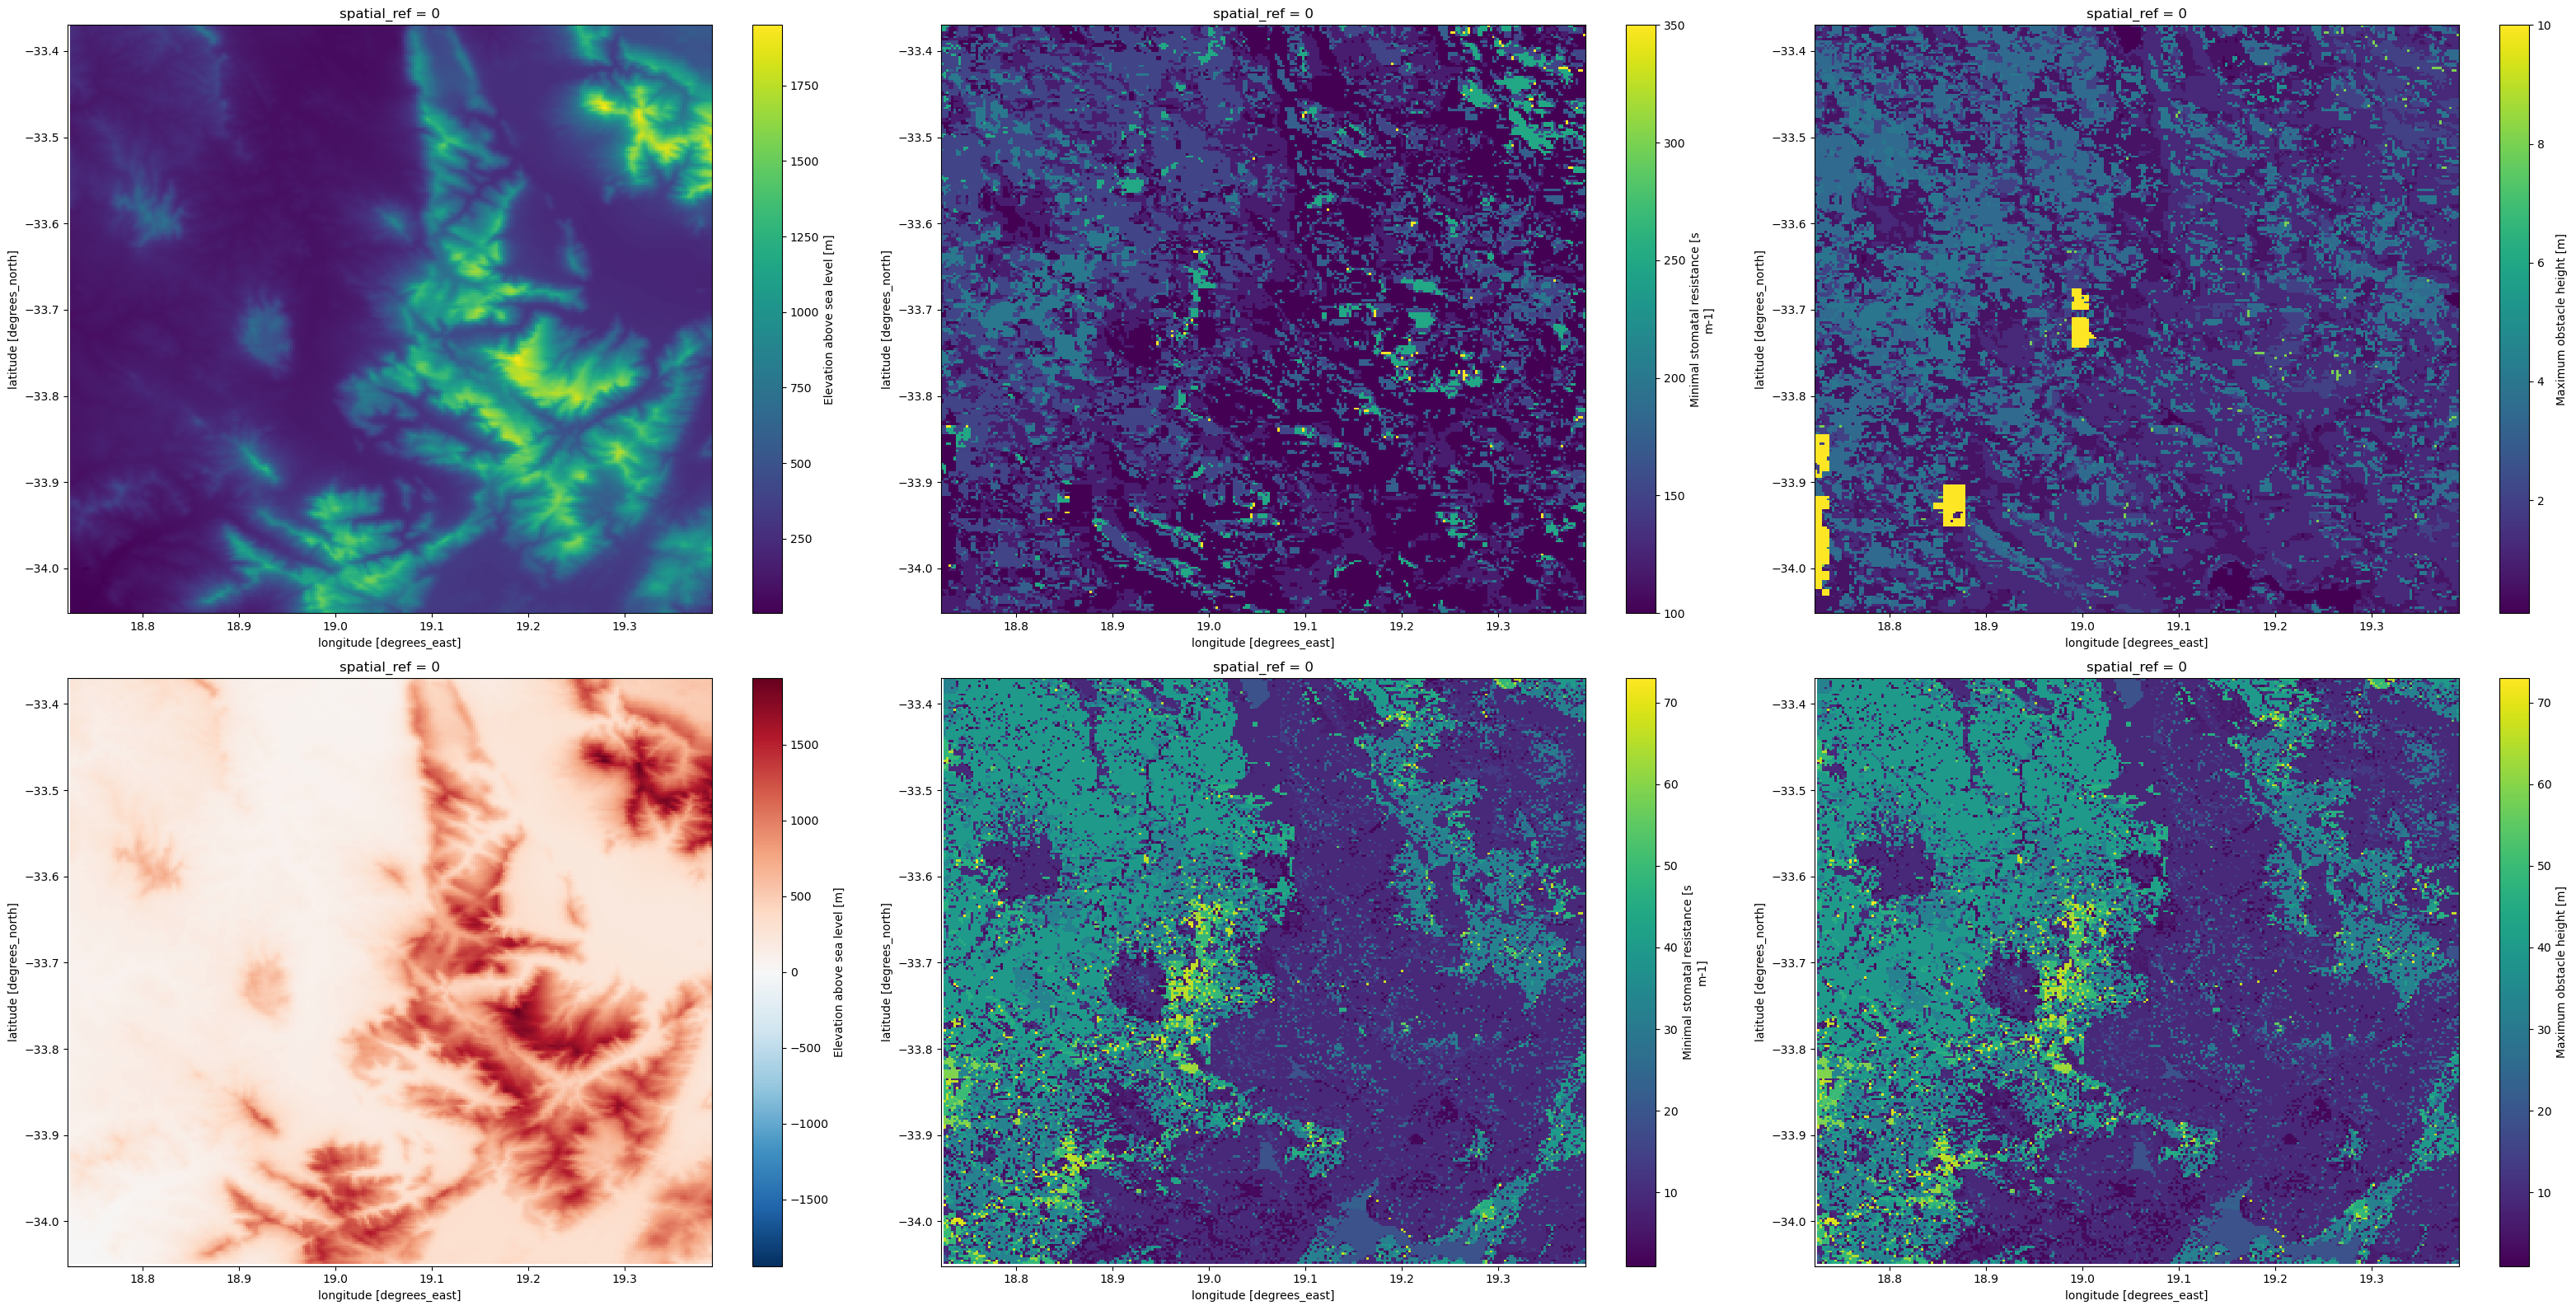

In [37]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(32,16))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.z.plot(ax=axes[0,0])
ds.rs_min.plot(ax=axes[0,1])
ds.z_obst_max.plot(ax=axes[0,2])

custom_input_ds.z.plot(ax=axes[1,0])
custom_input_ds.rs_min.plot(ax=axes[1,1])
custom_input_ds.z_obst_max.plot(ax=axes[1,2])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Running Custom ETLook

In [38]:
# Run et_look
custom_output_ds = pywapor.et_look.main(custom_input_ds)

> ET_LOOK
    --> Running `et_look` (v2).
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `vapour_pressure_deficit_daily`.
    --> Calculating `vapour_pressure_deficit`.
    --> Calculating `stress_vpd`.
    --> Calculating `stress_temperature`.
    --> Calculating `

In [ ]:
custom_output_ds

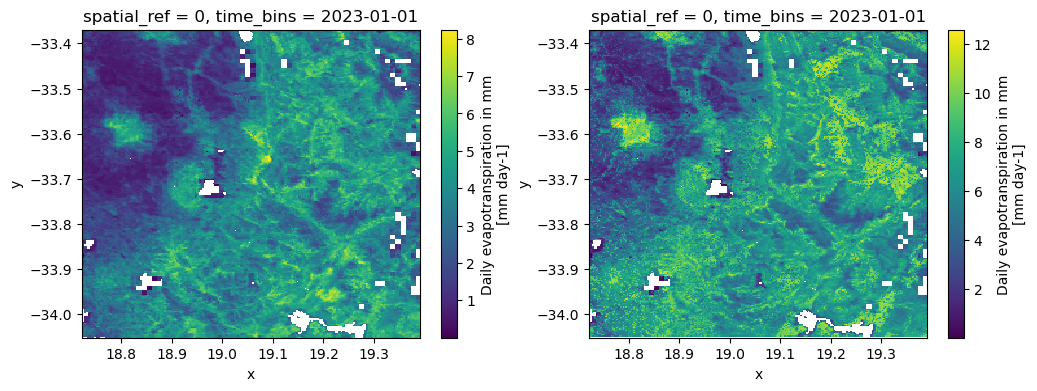

In [39]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
# Plot the daily evapotranspiration in mm
ds_out.et_24_mm.isel(time_bins = 0).plot(ax=axes[0])
custom_output_ds.et_24_mm.isel(time_bins = 0).plot(ax=axes[1])

In [40]:
# Note these calculations loads the array into working memory
print("*******************************************************************")
print("***************************   DEFAULT   ***************************")
print("*******************************************************************")
et_data = ds_out.et_24_mm.isel(time_bins = 0).values
print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))
print("*******************************************************************")
print("***************************   CUSTOM   ****************************")
print("*******************************************************************")
# Note these calculations loads the array into working memory
custom_et_data = custom_output_ds.et_24_mm.isel(time_bins = 0).values
print("resolution:", custom_et_data.shape)
print("total pixels:", custom_et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(custom_et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(custom_et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(custom_et_data)))
print("mean: {0:.2f}".format(np.nanmean(custom_et_data)))
print("median: {0:.2f}".format(np.nanmedian(custom_et_data)))
print("*******************************************************************")

*******************************************************************
***************************   DEFAULT   ***************************
*******************************************************************
resolution: (266, 261)
total pixels: 69426
number of pixels with missing data: 1861
maximum value: 8.24
minimum value: 0.00
mean: 3.36
median: 3.53
*******************************************************************
***************************   CUSTOM   ****************************
*******************************************************************
resolution: (266, 261)
total pixels: 69426
number of pixels with missing data: 2106
maximum value: 12.59
minimum value: 0.00
mean: 6.05
median: 6.28
*******************************************************************
